In [19]:
import pandas as pd
import csv
from datetime import datetime, timedelta
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import json
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [20]:
input_file = 'cleansing_data_create.csv'
output_file = 'output_cleansing_data_create.csv'

column1_index = 6
column2_index = 10

with open(input_file, 'r') as file_in, open(output_file, 'w', newline='') as file_out:
   reader = csv.reader(file_in)
   writer = csv.writer(file_out)

   for row in reader:
       if column1_index < len(row) and column2_index < len(row):
           combined_value = row[column1_index] + ' ' + row[column2_index]

           row[column1_index] = combined_value

      writer.writerow(row)

print("Columns combined successfully")

In [21]:
data = pd.read_csv('output_cleansing_data_create.csv')
data

,IP,IP Awal,IP Oktet 2,IP Oktet 3,IP Oktet 4,IP Gabungan,TGL_GABUNGAN,JAM,MENIT,DETIK,JAM GABUNG,METHOD,ACTION
0,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,07/Aug/2022 10:30:31,10.0,30.0,31.0,10:30:31,GET,/MHS.Registrasi.Kuliah
1,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,07/Aug/2022 10:30:35,10.0,30.0,35.0,10:30:35,POST,/MHS.Registrasi.Kuliah
2,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,07/Aug/2022 22:50:22,22.0,50.0,22.0,22:50:22,GET,/MHS.Registrasi.Kuliah
3,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,07/Aug/2022 22:50:34,22.0,50.0,34.0,22:50:34,POST,/MHS.Registrasi.Kuliah
4,162.158.162.108,162.0,158.0,162.0,108.0,162.158.162.108,07/Aug/2022 22:50:35,22.0,50.0,35.0,22:50:35,POST,/MHS.Registrasi.Kuliah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 03:55:42,3.0,55.0,42.0,03:55:42,POST,/MHS.Registrasi.Kuliah
13836,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 04:05:22,4.0,5.0,22.0,04:05:22,GET,/MHS.Registrasi.Kuliah
13837,162.158.170.244,162.0,158.0,170.0,244.0,162.158.170.244,15/Aug/2022 05:49:05,5.0,49.0,5.0,05:49:05,GET,/MHS.Registrasi.Kuliah
13838,162.158.233.112,162.0,158.0,233.0,112.0,162.158.233.112,10/Aug/2022 21:05:46,21.0,5.0,46.0,21:05:46,GET,/MHS.Registrasi.Kuliah


In [22]:
from reportlab.lib.units import cm
from reportlab.lib.pagesizes import landscape,letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
from reportlab.lib import colors

# Read CSV data using pandas
data = pd.read_csv('output_cleansing_data_create.csv')

# Convert pandas DataFrame to a list of lists for the table
data_table = [data.columns.tolist()] + data.values.tolist()

# Create a PDF file
pdf_file = "output.pdf"  # Replace with your desired PDF output path
doc = SimpleDocTemplate(pdf_file, pagesize=landscape((50*cm, 200*cm)))

# Create a table with the CSV data
table = Table(data_table, colWidths=150)
style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    ('GRID', (0, 0), (-1, -1), 1, colors.black)
])
table.setStyle(style)

# Build the PDF document
doc.build([table])
print(f"PDF file '{pdf_file}' generated.")

In [23]:
data['TGL_GABUNGAN'] = pd.to_datetime(data['TGL_GABUNGAN'])
data['Interval'] = data['TGL_GABUNGAN'].dt.round('1min')
data_grouped = data.groupby(['Interval', 'IP']).size().reset_index(name='count')
print(data_grouped)

                Interval               IP  count
0    2022-08-07 07:27:00  162.158.162.210      1
1    2022-08-07 07:33:00  162.158.163.159      2
2    2022-08-07 08:09:00  162.158.170.162      2
3    2022-08-07 08:10:00  162.158.170.162      2
4    2022-08-07 08:43:00  162.158.163.169      1
...                  ...              ...    ...
8786 2022-08-15 06:05:00  162.158.162.210      1
8787 2022-08-15 06:06:00  162.158.162.210      1
8788 2022-08-15 06:09:00  162.158.170.162      1
8789 2022-08-15 06:17:00  162.158.162.198      3
8790 2022-08-15 06:24:00  162.158.163.225      2

[8791 rows x 3 columns]


In [24]:
data_grouped.to_csv('output_IP_count.csv')

In [25]:
dataset_IP_count = pd.read_csv('output_IP_count.csv')
summy = sum(dataset_IP_count['count'])
county = dataset_IP_count['IP'].count()
new_dataset_IP = dataset_IP_count['count']
output_datas = []
for x in new_dataset_IP:
    formula = x/county*100
    output_datas.append(formula)

arrays = np.array(output_datas)
with open('output_FP_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['NO', 'output'])
    for i, numbers in enumerate(arrays):
        writer.writerow([i, numbers])

In [26]:
dataset_FP = pd.read_csv('output_FP_data.csv', sep=',')

x = dataset_FP[['output']]
y = dataset_IP_count['count']
print(x)
print(y)

        output
0     0.011375
1     0.022751
2     0.022751
3     0.022751
4     0.011375
...        ...
8786  0.011375
8787  0.011375
8788  0.011375
8789  0.034126
8790  0.022751

[8791 rows x 1 columns]
0       1
1       2
2       2
3       2
4       1
       ..
8786    1
8787    1
8788    1
8789    3
8790    2
Name: count, Length: 8791, dtype: int64


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = SVC(kernel='rbf', C=1.0, gamma=1.0, max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Training score: ', model.score(x_train, y_train))
print('Test score: ', model.score(x_test, y_test))
print('Training Accuracy Score: ', accuracy_score(y_train, y_pred_train))

c:\Users\NITRO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Accuracy score: 0.8840030326004549
Training score:  0.8966357874207703
Test score:  0.8840030326004549
Training Accuracy Score:  0.8966357874207703


In [28]:
cm  = confusion_matrix(y_train, y_pred_train)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4205    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1312    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0  385    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0  114    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0   53    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0   23    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0   22    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    8    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    5    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    4    0    0    0    0    0

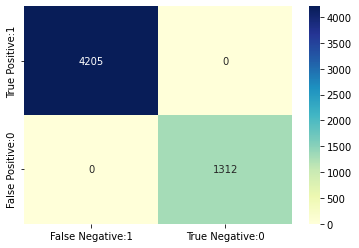

In [29]:
cm_matrix = pd.DataFrame(data=cm[:2, :2], columns=['True Positive:1', 'False Positive:0'], index=['False Negative:1', 'True Negative:0'])
cm = confusion_matrix(y_train, y_pred_train)
output = sns.heatmap(cm_matrix.T, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('output_svm.jpg', dpi=300, bbox_inches='tight')

In [30]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1738    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  594    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  171    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   65    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   28    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   15    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   10    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    6    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0 

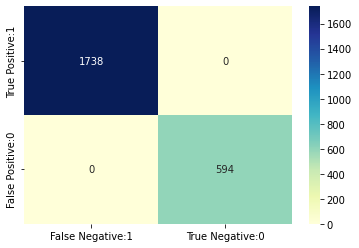

In [31]:
cm_matrix = pd.DataFrame(data=cm[:2, :2], columns=['True Positive:1', 'False Positive:0'], index=['False Negative:1', 'True Negative:0'])
cm = confusion_matrix(y_test, y_pred)
output = sns.heatmap(cm_matrix.T, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('output_svm.jpg', dpi=300, bbox_inches='tight')

In [32]:
print(classification_report(y_test, y_pred, zero_division=0))
report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

with open("classification_report_SVM.json", "w") as file:
    json.dump(report, file)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1738
           2       0.66      1.00      0.80       594
           3       0.00      0.00      0.00       171
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
         160       0.00      0.00      0.00         1

    accuracy                           0.88      2638
   macro avg       0.12      0.14      0.13      2638
weighted avg       0.81      0.88      0.84      2638



In [33]:
import random

data1 = dataset_FP['output']
data2 = dataset_IP_count['count']
def systematic_random_sampling(data1, data2, sample_size):
    if sample_size <= 0:
        raise ValueError("Jumlah sampel yang diambil harus lebih besar dari 0.")

    population_size = len(data1)
    interval = population_size // sample_size

    random_start_index = random.randint(0, interval - 1)

    sampled_data1 = [data1[i] for i in range(random_start_index, population_size, interval)]
    sampled_data2 = [data2[i] for i in range(random_start_index, population_size, interval)]

    return sampled_data1, sampled_data2

sampled_data1, sampled_data2 = systematic_random_sampling(data1,data2, 10)


df_sampled = pd.DataFrame({'Output Data 1': sampled_data1, 'Other Data 2': sampled_data2})
df_sampled.to_csv('sampled_data.csv', index=False)